#     Forecast using Data Driven Model

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import warnings

In [22]:
airlines = pd.read_excel("Airlines+Data.xlsx")
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [23]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [24]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [25]:
airlines = airlines.set_index('Month')

##    Splitting Dataset

In [26]:
train = airlines.head(60)
test = airlines.tail(36)

##     Visualization

###    1)  Line Plot

<AxesSubplot:xlabel='Month'>

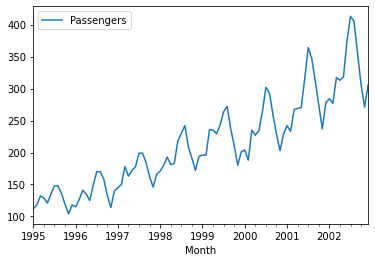

In [27]:
airlines.plot()

###     2)  Moving Average 

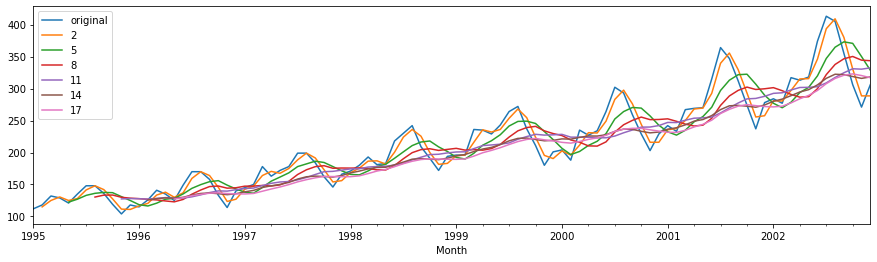

In [28]:
plt.figure(figsize=(15,4))
airlines.Passengers.plot(label="original")
for i in range(2,20,3):
    airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

###     3)   Time Series Decomposition Plot

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-30-da090826c797>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=12)


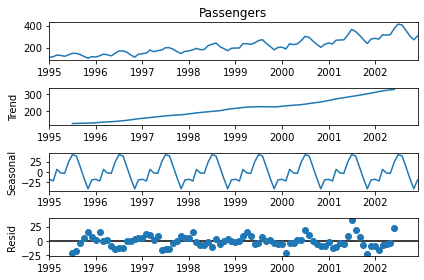

In [30]:
decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=12)
decompose_ts_add.plot()
plt.show() 

##    DIfferent Data Driven Models

###    Evaluating model using MAPE

In [31]:
def MAPE(pred,original):
    temp = np.abs((pred-original)/original)*100
    return np.mean(temp)

###     1)  Simple Exponential Method

In [32]:
simple_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_simple = simple_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_simple,test.Passengers) 

E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


22.209687323239553

###   2)  Holt method

In [33]:
holt_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_holt = holt_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_holt,test.Passengers) 

E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-33-84c9dcbf13c3>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  holt_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


63.76314530631963

###    3)  Holts winter exponential smoothing with additive seasonality and additive trend

In [36]:
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=24).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Passengers) 

E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


11.467812248485636

###    4)  Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [39]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=24).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Passengers)

E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


7.799552828801798

##  Building Final  Model 

In [40]:
hwe_model_add_add = ExponentialSmoothing(airlines["Passengers"],seasonal="add",trend="add",seasonal_periods=24).fit()

E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [42]:
hwe_model_add_add.forecast(24)

2003-01-01    312.660965
2003-02-01    313.162213
2003-03-01    342.154298
2003-04-01    337.903750
2003-05-01    336.898171
2003-06-01    356.648221
2003-07-01    382.648810
2003-08-01    380.401115
2003-09-01    356.150705
2003-10-01    330.402989
2003-11-01    305.659994
2003-12-01    329.662967
2004-01-01    332.411717
2004-02-01    331.669648
2004-03-01    360.417278
2004-04-01    352.921732
2004-05-01    353.919984
2004-06-01    390.175718
2004-07-01    417.676785
2004-08-01    416.426266
2004-09-01    384.177056
2004-10-01    353.671664
2004-11-01    328.921782
2004-12-01    356.169580
Freq: MS, dtype: float64

###    Thus forecasted for the next two and half years using data driven method 